**Introduction to PyTorch - Tensors, Autograd Module, Optim Module**

In [1]:
!pip install torch

In [0]:
import torch as pyt
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# a tensor of 3 rows and 2 columns with ones
ten_x = pyt.ones(3,2)
print(ten_x)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


In [4]:
# a tensor of 3 rows and 2 columns with zeroes
ten_y = pyt.zeros(3,2)
print(ten_y)


tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


In [5]:
# a tensor of 3 rows and 2 columns with random values
ten_z = pyt.rand(3, 2)
print(ten_z)

tensor([[0.2583, 0.5984],
        [0.9675, 0.0051],
        [0.5267, 0.2820]])


In [6]:
#Tensor Operations
ten_p = pyt.rand(3, 2)
print(ten_p)
#Tensor Slicing
print(ten_p[0,:])
print(ten_p[2,0:1])
print(ten_p[0:2,0:2])


tensor([[0.4970, 0.3589],
        [0.1551, 0.8545],
        [0.6493, 0.3422]])
tensor([0.4970, 0.3589])
tensor([0.6493])
tensor([[0.4970, 0.3589],
        [0.1551, 0.8545]])


In [7]:
#Create two tensors
x = pyt.ones([2, 2])
y = pyt.ones([2, 2])
print(x,"\n",y)
#adding two tensors
m = x + y #method 1
n = pyt.add(x,y) #method 2
print(m,"\n",n)

#subtracting two tensors
m = x - y #method 1
n=pyt.sub(x,y) #method 2
print(m,"\n",n)

tensor([[1., 1.],
        [1., 1.]]) 
 tensor([[1., 1.],
        [1., 1.]])
tensor([[2., 2.],
        [2., 2.]]) 
 tensor([[2., 2.],
        [2., 2.]])
tensor([[0., 0.],
        [0., 0.]]) 
 tensor([[0., 0.],
        [0., 0.]])


In [8]:
#check CUDA support
print(pyt.cuda.device_count())

1


In [9]:
# PyTorch Version
print(pyt.__version__)

1.4.0


In [10]:
#GPU Hardware Check
print(pyt.cuda.get_device_name(0))

Tesla P100-PCIE-16GB


In [11]:
cuda_dev = pyt.device('cuda:0')
#Performing the addition on GPU
ten_a = pyt.ones(2, 2, device=cuda_dev)
#creating a tensor 'ten_a' on GPU
ten_b = pyt.ones(2, 2, device=cuda_dev)
#creating a tensor 'ten_b' on GPU
ten_c = ten_a + ten_b
print(ten_c)

tensor([[2., 2.],
        [2., 2.]], device='cuda:0')


In [12]:
#moving the result to cpu
ten_c = ten_c.cpu()
print(ten_c)

tensor([[2., 2.],
        [2., 2.]])


In [13]:
import torch as pyt
#create a tensor with requires_grad = True
ten_x = pyt.ones([2,2], requires_grad = True)
print(ten_x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [14]:
ten_y = ten_x + 3 #tensor addition
print(ten_y)
ten_z = ten_y*ten_y + 3
print(ten_z)
ten_f= pyt.sum(ten_z) #adding all the values in z
print(ten_f)

tensor([[4., 4.],
        [4., 4.]], grad_fn=<AddBackward0>)
tensor([[19., 19.],
        [19., 19.]], grad_fn=<AddBackward0>)
tensor(76., grad_fn=<SumBackward0>)


In [15]:
ten_f.backward()
print(ten_x.grad)

tensor([[8., 8.],
        [8., 8.]])


In [17]:
'''from torch import optim as op
#define adam optimizer
adam_opt=op.Adam(model.parameters(),lr=0.01)'''

'from torch import optim as op\n#define adam optimizer\nadam_opt=op.Adam(model.parameters(),lr=0.01)'

**Practical Implementation of Artificial Neural Network with PyTorch**

In [0]:
import torch as pyt
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
ten_x=Variable(pyt.Tensor([[1.0], [2.0],[3.0],[5.0],[7.0]]))
ten_y=Variable(pyt.Tensor([[2.0], [4.0], [6.0],[9.8],[15.0]]))
class NNModel(pyt.nn.Module):
      def __init__(self):
          super(NNModel, self).__init__()
          self.linear = pyt.nn.Linear(1, 1)
      def forward(self, x):
          y_pred = self.linear(x)
          return y_pred
our_model = NNModel()
criterion = pyt.nn.MSELoss()
optimizer = pyt.optim.SGD(our_model.parameters(), lr = 0.0001)
loss_values = []

epoch 0, loss 127.26729583740234
epoch 1, loss 126.33573913574219
epoch 2, loss 125.4110107421875
epoch 3, loss 124.4930419921875
epoch 4, loss 123.5818099975586
epoch 5, loss 122.67724609375
epoch 6, loss 121.77931213378906
epoch 7, loss 120.88795471191406
epoch 8, loss 120.00312805175781
epoch 9, loss 119.1247787475586
epoch 10, loss 118.25285339355469
epoch 11, loss 117.3873519897461
epoch 12, loss 116.52816009521484
epoch 13, loss 115.6752700805664
epoch 14, loss 114.82861328125
epoch 15, loss 113.9881820678711
epoch 16, loss 113.1539077758789
epoch 17, loss 112.32572174072266
epoch 18, loss 111.50362396240234
epoch 19, loss 110.68753814697266
epoch 20, loss 109.87742614746094
epoch 21, loss 109.0732650756836
epoch 22, loss 108.27497863769531
epoch 23, loss 107.4825439453125
epoch 24, loss 106.6959228515625
epoch 25, loss 105.91505432128906
epoch 26, loss 105.1399154663086
epoch 27, loss 104.37044525146484
epoch 28, loss 103.60660552978516
epoch 29, loss 102.84837341308594
epoch 30

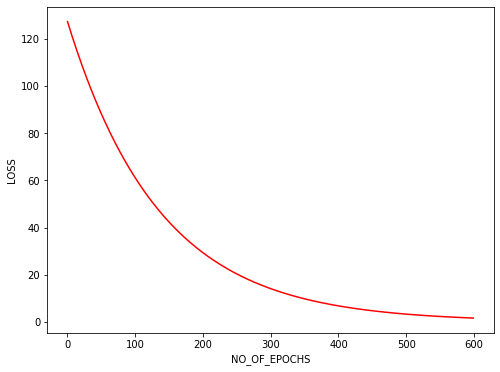

In [19]:
for epoch in range(600):
    pred_y = our_model(ten_x) 
    loss = criterion(pred_y, ten_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch {}, loss {}'.format(epoch, loss.item()))
    loss_values.append(loss.item())
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(np.array(loss_values), 'r')
plt.xlabel("NO_OF_EPOCHS")
plt.ylabel("LOSS")
new_var = Variable(pyt.Tensor([[4.0]]))
pred_y = our_model(new_var)
print("Prediction(after training)", 4, our_model(new_var).data[0][0])